# Simple Linear Regression

## Imports

In [250]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
%matplotlib inline

## Dataset

In [269]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

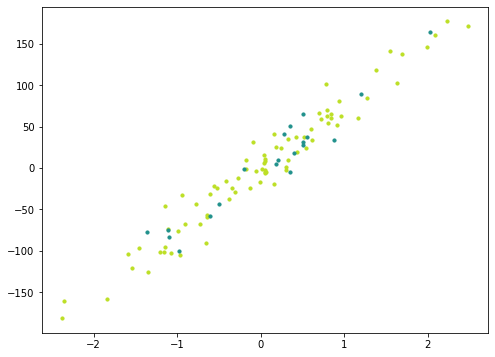

In [270]:
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.show()

## Linear Regression Class

In [285]:
class SimpleLinearRegression:

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        # Gradient descent
        for i in range(self.n_iters):
            error = (np.dot(X, self.weights) + self.bias) - y
            dw = (1/(2*n_features)) * np.dot(X.T, error)
            db = (1/(2*n_features)) * np.sum(error)
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            self.loss_history.append(np.mean(sum(error)**2))
      

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## Train

### Cost function

In [286]:
def loss(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

### Define regressor and train the model

In [287]:
regressor = SimpleLinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
loss_value = loss(y_test, predicted)
print("Loss history: ", regressor.loss_history)
print("Loss value: ", loss_value)


Loss history:  [9146.22361750129, 7652.508364860846, 6371.713280109422, 5276.8468416130045, 4344.0635078514, 3552.318574925409, 2883.059233411379, 2319.9481566977215, 1848.616314604637, 1456.4420328657775, 1132.353614248905, 866.6531037026107, 650.8590206591842, 477.56609895911186, 340.3202710246815, 233.50730991834988, 152.25370261170607, 92.33847181967762, 50.11479362804633, 22.440375220957574, 6.615662532131366, 0.32904271550222974, 1.6082919681282646, 8.77759635529481, 20.419542712251634, 35.341539177653544, 52.54618112795239, 71.20512884220798, 90.63610868692028, 110.2826904714598, 129.6965303389051, 148.52180153410575, 166.4815649993195, 183.36585832322166, 199.02130541094917, 213.34207062578082, 226.26200032048422, 237.7478118526574, 247.79320556089814, 256.41378895127167, 263.6427146658204, 269.52694482653396, 274.1240641996566, 277.4995734269325, 279.72460142939025, 280.8739831025153, 281.0246546763034, 280.2543246881899, 278.64038348213643, 276.2590185661043, 273.184507090790

## Test

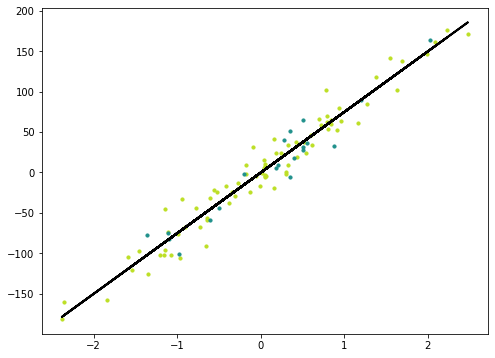

In [288]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()